In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sportsref.baseball import Season
import seaborn as sns
from matplotlib.patches import Ellipse, Polygon
import numpy as np

In [2]:
szn2021 = Season(2021)

In [3]:
std_bat = szn2021.batting_pages('standard').get_df('teams_standard_batting')

Available tables: ['teams_standard_batting', 'players_standard_batting']


In [4]:
baserun_df = szn2021.batting_pages('baserunning').get_df('teams_baserunning_batting')

Available tables: ['teams_baserunning_batting', 'players_baserunning_batting']


In [5]:
df = std_bat.merge(baserun_df, on='Tm')

In [6]:
plot_df = df.query('Tm != "LgAvg"')
plot_df["xbt_pct"] = plot_df["XBT%"].str.replace('%','').astype(int) /100

/home/jup/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
plot_df.head()

,Tm,#Bat,BatAge,R/G_x,G,PA,AB,R,H,2B,...,1stS,1stS2,1stS3,1stD,1stD3,1stDH,2ndS,2ndS3,2ndSH,xbt_pct
0,ARI,44,29.4,4.28,61,2335,2081,261,488,107,...,104,76,26,29,17,12,55,22,32,0.37
1,ATL,41,27.6,4.86,57,2125,1863,277,438,91,...,83,62,20,26,15,11,53,19,33,0.40
2,BAL,39,27.1,4.07,59,2167,1960,240,469,102,...,98,76,21,27,16,8,55,14,40,0.38
3,BOS,33,28.1,4.98,59,2194,1998,294,514,134,...,99,71,28,37,21,14,62,23,37,0.40
4,CHC,44,29.3,4.56,59,2198,1935,269,457,81,...,90,53,34,25,13,11,46,16,28,0.45


In [8]:
plt.xkcd()

In [9]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random
random.seed(69)
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=random.uniform(.06,.061))

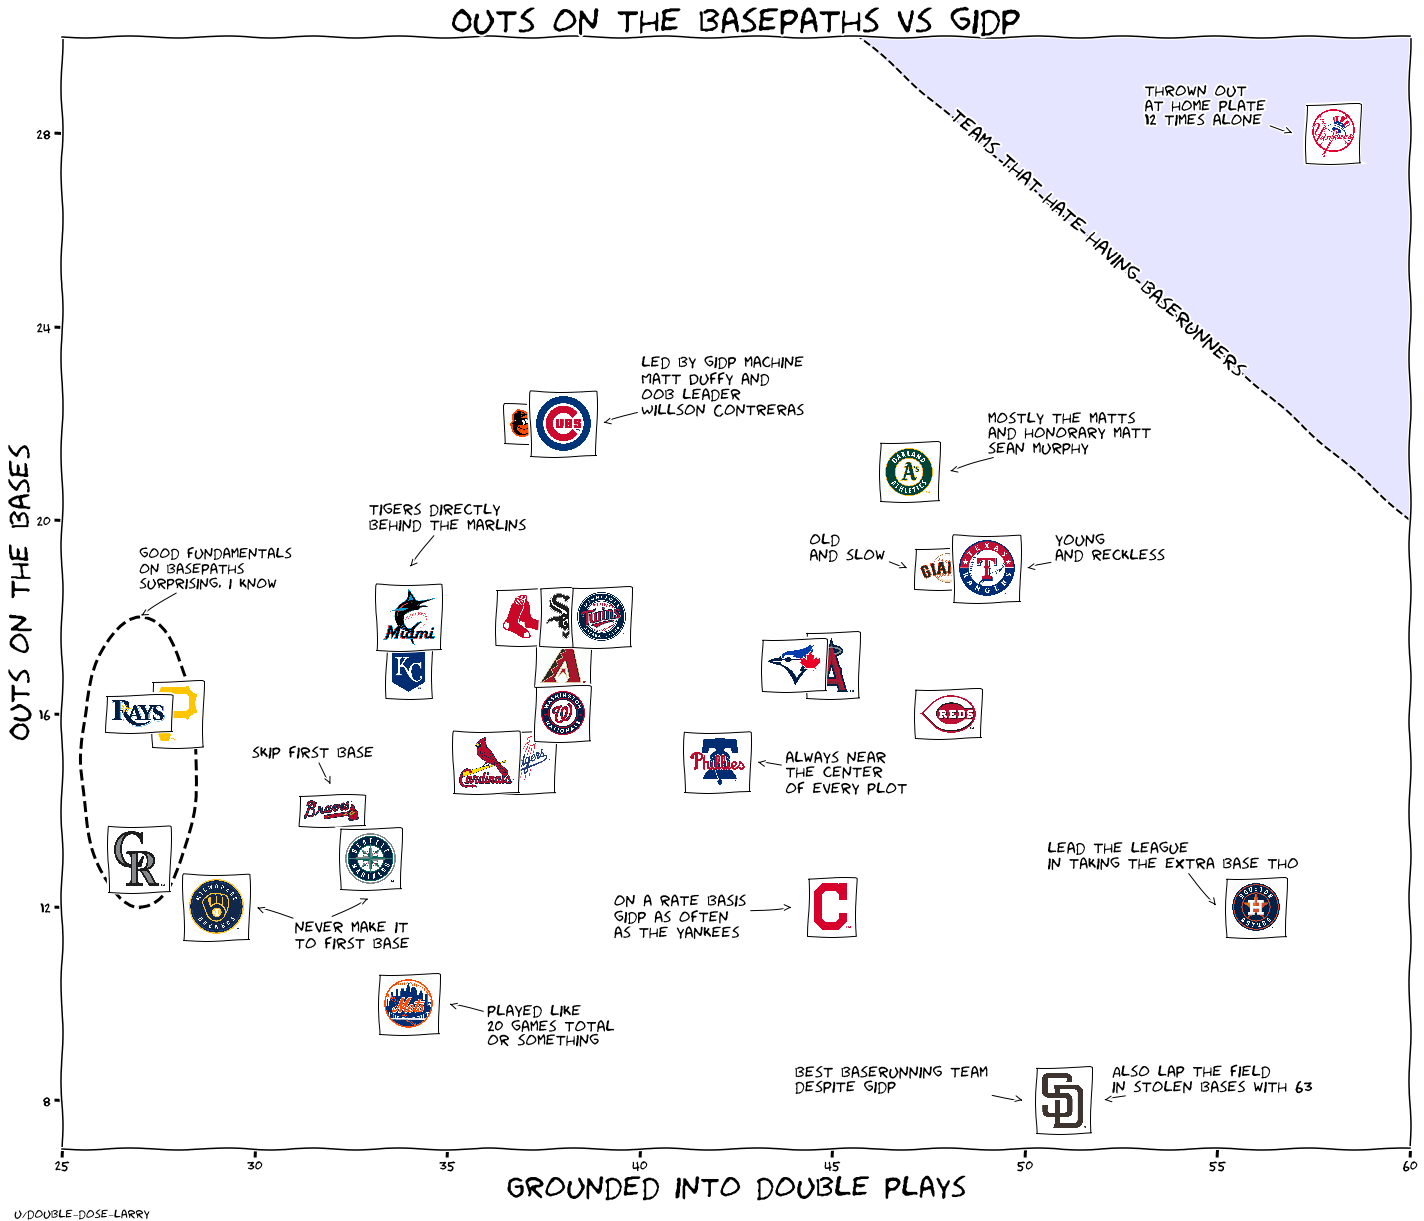

In [65]:
f, ax = plt.subplots(figsize=(20,17))

x = plot_df.GDP
y = plot_df.OOB

ax.scatter(x,y)

imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'{tm.Tm}.png'),
                      (tm.GDP, tm.OOB),
                       frameon=True
                      )
    )
    for tm in plot_df.itertuples()
]

# labels = [
#     ax.annotate(tm.Tm,
#                (tm.GDP, tm.OOB + .3))
#     for tm in plot_df.itertuples()
# ]

# despise having baserunners
fill_x = np.arange(45,65,0.1)
fill_y = 62 -  0.7* fill_x
fill_y2 = 162 -  0.7* fill_x
ax.plot(fill_x, fill_y, ls="--", c="k", label="despise having baserunners")
ax.fill_between(fill_x, fill_y, fill_y2, alpha=0.1, color="b")
ax.annotate("teams that hate having baserunners",
            (48,23),
           size=20,
           rotation=-42)

# annotate yankees
ax.annotate(
    "thrown out\nat home plate\n12 times alone",
    (57, 28),
    size=16,
    xytext = (-150, 10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate astros
ax.annotate(
    "lead the league\nin taking the extra base tho",
    (55, 12),
    size=16,
    xytext = (-170, 40),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate padres
ax.annotate(
    "best baserunning team\ndespite gidp",
    (50, 8),
    size=16,
    xytext = (-230, 10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

ax.annotate(
    "Also lap the field\nin stolen bases with 63",
    (52, 8),
    size=16,
    xytext = (10, 10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate cubs
ax.annotate(
    "led by gidp machine\nMatt Duffy and\noob leader\nWillson Contreras",
    (39, 22),
    size=16,
    xytext = (40, 10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate cleveland
ax.annotate(
    "on a rate basis\ngidp as often\nas the yankees",
    (44, 12),
    size=16,
    xytext = (-180, -29),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate phillies
ax.annotate(
    "always near\nthe center\nof every plot",
    (43, 15),
    size=16,
    xytext = (30, -30),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate braves
ax.annotate(
    "skip first base",
    (32, 14.5),
    size=16,
    xytext = (-80, 30),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate giants
ax.annotate(
    "old\nand slow",
    (47, 19),
    size=16,
    xytext = (-100, 10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate rangers
ax.annotate(
    "young\nand reckless",
    (50, 19),
    size=16,
    xytext = (30, 10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate oak
ax.annotate(
    "mostly the matts\nand honorary matt\nsean murphy",
    (48, 21),
    size=16,
    xytext = (40, 20),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# good fundamentals on the base paths
ax.add_patch(Ellipse(xy=(27,15), 
                     width=3, 
                     height=6, 
                     angle=0, fill=False, ls="--", lw=3))
ax.annotate(
    "good fundamentals\non basepaths\nsurprising, i know",
    (27, 18),
    size=15,
    xytext = (0, 30),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)


# annotate mil and sea
ax.annotate(
    "never make it\nto first base",
    (30, 12),
    size=16,
    xytext = (40, -40),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

ax.annotate(
    "",
    (33, 12.2),
    size=16,
    xytext = (-40, -20),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate mets
ax.annotate(
    "played like\n20 games total\nor something",
    (35, 10),
    size=16,
    xytext = (40, -40),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

# annotate det
ax.annotate(
    "tigers directly\nbehind the marlins",
    (34, 19),
    size=16,
    xytext = (-40, 40),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)



plt.yticks(range(8,30,4))
plt.ylim((7,30))
plt.xlim((25,60))
plt.xlabel("Grounded into double plays", size=30)
plt.ylabel("Outs on the bases", size=30)
plt.title("Outs on the basepaths vs gidp", size=35)
plt.tight_layout(h_pad=2)
#sign
plt.annotate('u/double_dose_larry',
            xy=(.01, .01), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12)

plt.savefig('outs_vs_gidp.png')